# Bonus Sweep - Variable Length

## Introduction

In [1]:
%cd .
%pwd
%cd "~/tmp/raw_data/213_HGT_VarLength_BonusSweep/"
#%mkdir "analysis"
%cd "analysis"
%pwd

/home/rosiec/Dropbox/School_Docs/Research/HGT
/home/rosiec/tmp/raw_data/213_HGT_VarLength_BonusSweep
/home/rosiec/tmp/raw_data/213_HGT_VarLength_BonusSweep/analysis


u'/home/rosiec/tmp/raw_data/213_HGT_VarLength_BonusSweep/analysis'

In [2]:
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy  
import scikits.bootstrap as bootstrap
from scipy import stats
import matplotlib.gridspec as gridspec
#from IPython.display import Image
from PIL import Image
from IPython.display import Image as ipyImage

%matplotlib inline
%rehashx
pd.__version__

u'0.17.1'

In [4]:
#%pwd
%cat ../Bonus_Pow1_hgtbonus_*001/data/log_average.dat | head -n 20

# Avida Fitness Data
# Thu Feb  4 01:08:52 2016
#  1: Update
#  2: Fitness
#  3: Fitness STE
#  4: Fitness Variance
#  5: Log Fitness
#  6: Log Fitness STE
#  7: Log Fitness Variance

0 0 0 0 -inf -nan -nan 
100 0.264846 0.00105034 0.00396824 -1.34813 0.00301056 0.0326013 
200 0.340569 0.00423761 0.0646465 -1.19002 0.00676616 0.164811 
300 0.505885 0.00857695 0.264536 -0.911728 0.00998585 0.358583 
400 17.3305 1.92386 13298.5 -0.311862 0.0277655 2.76992 
500 31418.8 11838.1 4.96936e+11 1.2853 0.0612527 13.3042 
600 1.28975e+08 5.46636e+07 1.05092e+19 1.4873 0.0722379 18.3528 
700 1.47482e+13 4.26365e+12 6.40253e+28 2.01376 0.0988323 34.4023 
800 1.27606e+15 9.00597e+14 2.83065e+33 1.87353 0.0909021 28.8385 
900 1.01669e+13 9.80092e+12 3.38221e+29 2.66273 0.114736 46.3519 
cat: write error: Broken pipe


In [5]:
import sys
sys.path.append("~/Dropbox/School_Docs/Research/research_scripts/")
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py --help

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  -a, --all             display all lines of a source
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --data_members=MEMBER_COUNT
                        Number of Components from a given data source
                        (treatment)
  --alt_axis=ALT_AXIS   Use an alternative axis for the Nth data source
  --xtick_multiplier=XTICK_MULTIPLIER
                        X-axis Tick 

## Fitnesses

Aggregating control
Aggregating B_^0.1
Aggregating B_^0.5
Aggregating B_^1
Aggregating B_^2
Aggregating B_^3
Aggregating B_^4
Aggregating B_^5

Plotting 213_fitness


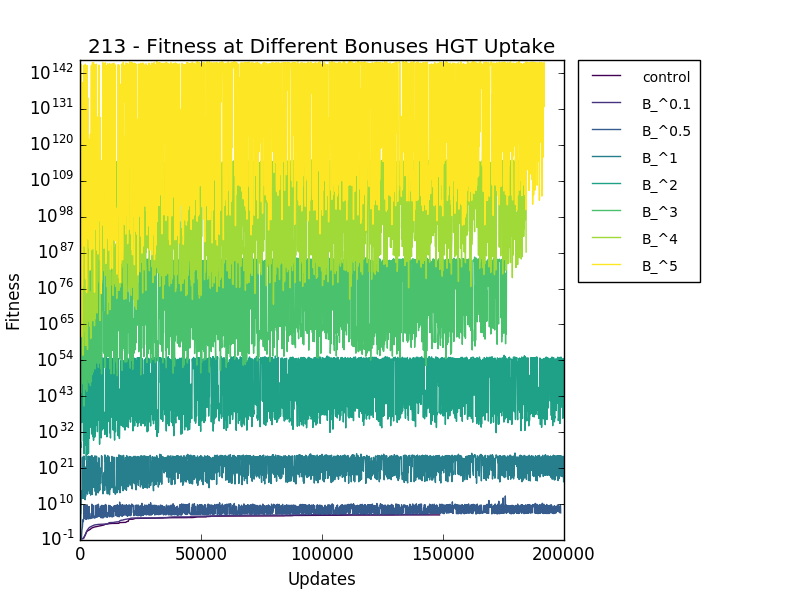

In [22]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py \
--samples 100 \
--ylog --title "213 - Fitness at Different Bonuses HGT Uptake" \
--xlabel "Updates" --ylabel "Fitness" --xtick_multiplier 100 \
213_fitness \
average.dat 4 \"../Bonus_Pow0.1_control_*/data/\" control \
average.dat 4 \"../Bonus_Pow0.1_hgtbonus_*/data/\" B_^0.1 \
average.dat 4 \"../Bonus_Pow0.5_hgtbonus_*/data/\" B_^0.5 \
average.dat 4 \"../Bonus_Pow1_hgtbonus_*/data/\" B_^1 \
average.dat 4 \"../Bonus_Pow2_hgtbonus_*/data/\" B_^2 \
average.dat 4 \"../Bonus_Pow3_hgtbonus_*/data/\" B_^3 \
average.dat 4 \"../Bonus_Pow4_hgtbonus_*/data/\" B_^4 \
average.dat 4 \"../Bonus_Pow5_hgtbonus_*/data/\" B_^5 \


ipyImage(filename='213_fitness.png') 

Aggregating control
Aggregating B_^0.1
Aggregating B_^0.5
Aggregating B_^1
Aggregating B_^2
Aggregating B_^3
Aggregating B_^4
Aggregating B_^5

Plotting 213_log_fitness


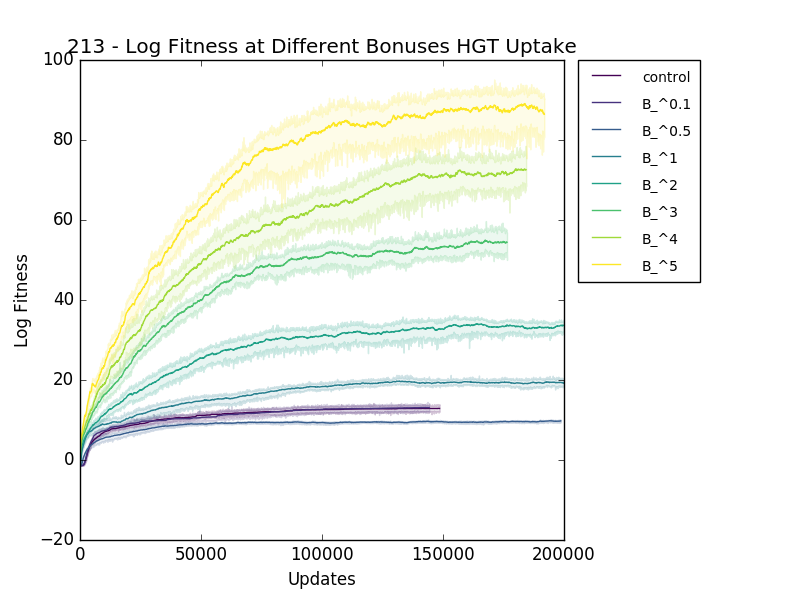

In [8]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py \
--error --samples 100 \
--title "213 - Log Fitness at Different Bonuses HGT Uptake" \
--xlabel "Updates" --ylabel "Log Fitness" --xtick_multiplier 100 \
213_log_fitness \
log_average.dat 5 \"../Bonus_Pow0.1_control_*/data/\" control \
log_average.dat 5 \"../Bonus_Pow0.1_hgtbonus_*/data/\" B_^0.1 \
log_average.dat 5 \"../Bonus_Pow0.5_hgtbonus_*/data/\" B_^0.5 \
log_average.dat 5 \"../Bonus_Pow1_hgtbonus_*/data/\" B_^1 \
log_average.dat 5 \"../Bonus_Pow2_hgtbonus_*/data/\" B_^2 \
log_average.dat 5 \"../Bonus_Pow3_hgtbonus_*/data/\" B_^3 \
log_average.dat 5 \"../Bonus_Pow4_hgtbonus_*/data/\" B_^4 \
log_average.dat 5 \"../Bonus_Pow5_hgtbonus_*/data/\" B_^5 \

ipyImage(filename='213_log_fitness.png') 

## Uptake Rates

In [10]:
cat ../Bonus_Pow0.1_hgtbonus_*001/data*/hgt.dat | head -n 15

# Horizontal gene transfer statistics
# Thu Feb  4 00:31:29 2016
#  1: Update [update]
#  2: Total count of metabolized genome fragments [metcount]
#  3: Total size of metabolized genome fragments [metsize]
#  4: Total count of insertion events [inscount]
#  5: Total size of insertion events [inssize]
#  6: Simple count of insertion events [inscount] DEBUG-RCK
#  7: Simple count of uptake events [inscount] DEBUG-RCK
#  8: Simple count of recombination events [inscount] DEBUG-RCK
#  9: Simple count of bonus events [inscount] DEBUG-RCK
# 10: Simple count of uptake attempt events [inscount] DEBUG-RCK

0 0 0 0 0 0 0 0 0 0 
100 0 0 0 0 0 669 81 588 1470 


Aggregating control_Attemp
~~SKIPPING, PLOTTING ONLY~~
Aggregating control_Up
~~SKIPPING, PLOTTING ONLY~~
Aggregating control_Rec
~~SKIPPING, PLOTTING ONLY~~
Aggregating control_Bon
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^0.1_Attemp
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^0.1_Up
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^0.1_Rec
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^0.1_Bon
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^0.5_Attemp
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^0.5_Up
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^0.5_Rec
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^0.5_Bon
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^1_Attempt
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^1_Up
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^1_Rec
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^1_Bon
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^2_Attemp
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^2_Up
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^2_Rec
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^2_Bon
~~SKIPPING, PLOTTING ONLY

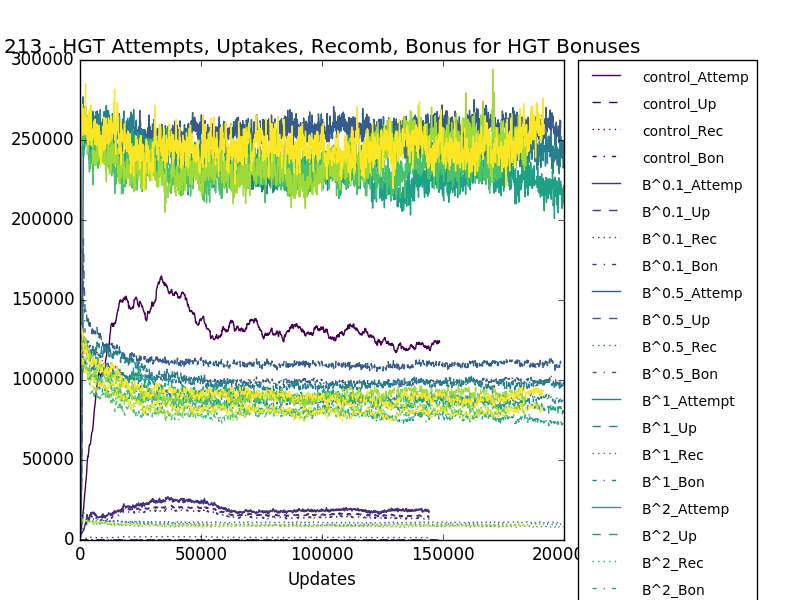

In [13]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py \
--samples 100 \
--plotonly \
--title "213 - HGT Attempts, Uptakes, Recomb, Bonus for HGT Bonuses" \
--xlabel "Updates" --ylabel "Events" --xtick_multiplier 100 \
--data_members 4 \
213_hgtbonus_attemptuptakerecbon \
\
hgt.dat 10 \"../Bonus_Pow0.1_control_*/data*/\" control_Attemp \
hgt.dat 7 \"../Bonus_Pow0.1_control_*/data*/\" control_Up \
hgt.dat 8 \"../Bonus_Pow0.1_control_*/data*/\" control_Rec \
hgt.dat 9 \"../Bonus_Pow0.1_control_*/data*/\" control_Bon \
\
hgt.dat 10 \"../Bonus_Pow0.1_hgtbonus_*/data*/\" B^0.1_Attemp \
hgt.dat 7 \"../Bonus_Pow0.1_hgtbonus*/data*/\" B^0.1_Up \
hgt.dat 8 \"../Bonus_Pow0.1_hgtbonus*/data*/\" B^0.1_Rec \
hgt.dat 9 \"../Bonus_Pow0.1_hgtbonus*/data*/\" B^0.1_Bon \
\
hgt.dat 10 \"../Bonus_Pow0.5_hgtbonus_*/data*/\" B^0.5_Attemp \
hgt.dat 7 \"../Bonus_Pow0.5_hgtbonus*/data*/\" B^0.5_Up \
hgt.dat 8 \"../Bonus_Pow0.5_hgtbonus*/data*/\" B^0.5_Rec \
hgt.dat 9 \"../Bonus_Pow0.5_hgtbonus*/data*/\" B^0.5_Bon \
\
hgt.dat 10 \"../Bonus_Pow1_hgtbonus*/data*/\" B^1_Attempt \
hgt.dat 7 \"../Bonus_Pow1_hgtbonus*/data*/\" B^1_Up \
hgt.dat 8 \"../Bonus_Pow1_hgtbonus*/data*/\" B^1_Rec \
hgt.dat 9 \"../Bonus_Pow1_hgtbonus*/data*/\" B^1_Bon \
\
hgt.dat 10 \"../Bonus_Pow2_hgtbonus*/data*/\" B^2_Attemp \
hgt.dat 7 \"../Bonus_Pow2_hgtbonus*/data*/\" B^2_Up \
hgt.dat 8 \"../Bonus_Pow2_hgtbonus*/data*/\" B^2_Rec \
hgt.dat 9 \"../Bonus_Pow2_hgtbonus*/data*/\" B^2_Bon \
\
hgt.dat 10 \"../Bonus_Pow3_hgtbonus*/data*/\" B^3_Attemp \
hgt.dat 7 \"../Bonus_Pow3_hgtbonus*/data*/\" B^3_Up \
hgt.dat 8 \"../Bonus_Pow3_hgtbonus*/data*/\" B^3_Rec \
hgt.dat 9 \"../Bonus_Pow3_hgtbonus*/data*/\" B^3_Bon \
\
hgt.dat 10 \"../Bonus_Pow4_hgtbonus*/data*/\" B^4_Attemp \
hgt.dat 7 \"../Bonus_Pow4_hgtbonus*/data*/\" B^4_Up \
hgt.dat 8 \"../Bonus_Pow4_hgtbonus*/data*/\" B^4_Rec \
hgt.dat 9 \"../Bonus_Pow4_hgtbonus*/data*/\" B^4_Bon \
\
hgt.dat 10 \"../Bonus_Pow5_hgtbonus*/data*/\" B^5_Attemp \
hgt.dat 7 \"../Bonus_Pow5_hgtbonus*/data*/\" B^5_Up \
hgt.dat 8 \"../Bonus_Pow5_hgtbonus*/data*/\" B^5_Rec \
hgt.dat 9 \"../Bonus_Pow5_hgtbonus*/data*/\" B^5_Bon 


ipyImage(filename='213_hgtbonus_attemptuptakerecbon.png') 

Aggregating control_Attemp
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^0.1_Attemp
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^0.5_Attemp
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^1_Attempt
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^2_Attemp
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^3_Attemp
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^4_Attemp
~~SKIPPING, PLOTTING ONLY~~
Aggregating B^5_Attemp
~~SKIPPING, PLOTTING ONLY~~

Plotting 213_hgtbonus_attemptuptakerecbon


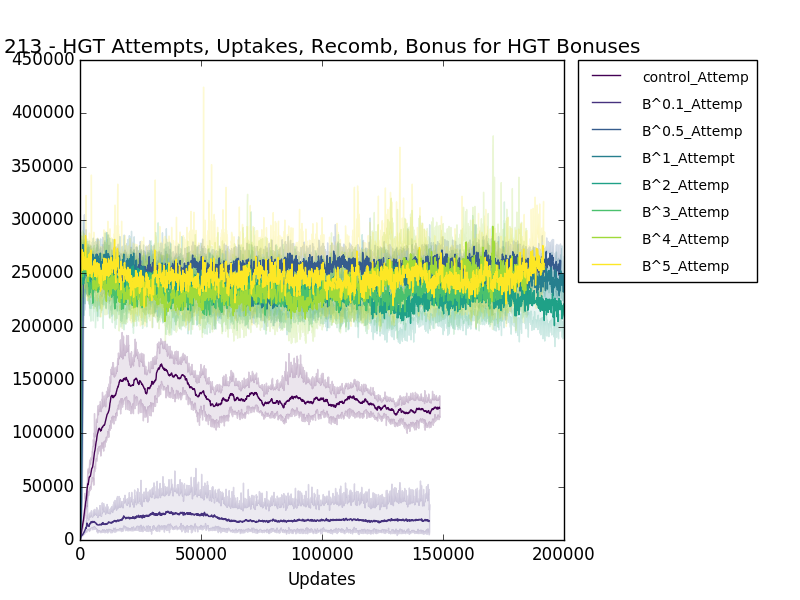

In [15]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py \
--error \
--samples 100 \
--plotonly \
--title "213 - HGT Attempts, Uptakes, Recomb, Bonus for HGT Bonuses" \
--xlabel "Updates" --ylabel "Events" --xtick_multiplier 100 \
--data_members 1 \
213_hgtbonus_attemptuptakerecbon \
\
hgt.dat 10 \"../Bonus_Pow0.1_control_*/data*/\" control_Attemp \
\
hgt.dat 10 \"../Bonus_Pow0.1_hgtbonus_*/data*/\" B^0.1_Attemp \
\
hgt.dat 10 \"../Bonus_Pow0.5_hgtbonus_*/data*/\" B^0.5_Attemp \
\
hgt.dat 10 \"../Bonus_Pow1_hgtbonus*/data*/\" B^1_Attempt \
\
hgt.dat 10 \"../Bonus_Pow2_hgtbonus*/data*/\" B^2_Attemp \
\
hgt.dat 10 \"../Bonus_Pow3_hgtbonus*/data*/\" B^3_Attemp \
\
hgt.dat 10 \"../Bonus_Pow4_hgtbonus*/data*/\" B^4_Attemp \
\
hgt.dat 10 \"../Bonus_Pow5_hgtbonus*/data*/\" B^5_Attemp \


ipyImage(filename='213_hgtbonus_attemptuptakerecbon.png') 

## Uptake Rates for all sub-treatments (control, hgt+bonus, etc.)

In [18]:
def plot_it(TREATM, #205 
               PROB, #1 
               filename, #hgt.dat
               descr, #HGT Uptakes
               columns, #[7,8]
               colnames, #['U','R'] 
               subtreats, #['control', 'hgt', 'hgtbonus', 'bonus']
               basename, #hgt_uptake_recomb 
               verbose=True, error=True):
    ROOT_TREATMENT="Bonus_Pow"+PROB

    !echo $ROOT_TREATMENT
    !echo $TREATM

    errstr = ""
    if error:
        errstr = "--error --samples 100"
    
    #!python2
    script = ' \
~/Dropbox/School_Docs/Research/research_scripts/quickplot.py ' + errstr + ' \
--title "' + descr + ' (Uptake_P: '+PROB+')" \
--xlabel "Updates" \
--ylabel "Uptake Events" --xtick_multiplier 100 \
--data_members '+ str(len(columns)) +' \
'+TREATM+'_'+basename+'_'+PROB+' \
'
    for trt in subtreats:
        for col, coln in zip(columns, colnames):
            script += filename + ' '\
            + str(col) + ' "../'\
            + ROOT_TREATMENT + '_' + trt + '_*/data*/" ' + trt + '_' + coln + ' '
    
    if verbose:
        script += '\
2>/dev/null'
        print script
    else:
        script += '\
>/dev/null 2>&1'
        print script
        
    !python2 $script
    
    return TREATM+'_'+basename+'_'+PROB+'.png'



In [20]:
files = []

probs = ['0.1', '0.5', '1', '2', '3', '4', '5']
for p in probs:
#    display(Image(filename=hgt_recomb("208", p, verbose=False)))
    files.append(plot_it("213", p, "hgt.dat", "HGT Uptakes", 
                   [7, 8, 9 ,10], ['Uptake', 'Recomb', 'Bonus','Attempts'], 
                    ['hgtbonus'],
                   "hgt_uptake_recomb", verbose=True, error=False))
print files    

Bonus_Pow0.1
213
 ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py  --title "HGT Uptakes (Uptake_P: 0.1)" --xlabel "Updates" --ylabel "Uptake Events" --xtick_multiplier 100 --data_members 4 213_hgt_uptake_recomb_0.1 hgt.dat 7 "../Bonus_Pow0.1_hgtbonus_*/data*/" hgtbonus_Uptake hgt.dat 8 "../Bonus_Pow0.1_hgtbonus_*/data*/" hgtbonus_Recomb hgt.dat 9 "../Bonus_Pow0.1_hgtbonus_*/data*/" hgtbonus_Bonus hgt.dat 10 "../Bonus_Pow0.1_hgtbonus_*/data*/" hgtbonus_Attempts 2>/dev/null
Aggregating hgtbonus_Uptake
Aggregating hgtbonus_Recomb
Aggregating hgtbonus_Bonus
Aggregating hgtbonus_Attempts

Plotting 213_hgt_uptake_recomb_0.1
Bonus_Pow0.5
213
 ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py  --title "HGT Uptakes (Uptake_P: 0.5)" --xlabel "Updates" --ylabel "Uptake Events" --xtick_multiplier 100 --data_members 4 213_hgt_uptake_recomb_0.5 hgt.dat 7 "../Bonus_Pow0.5_hgtbonus_*/data*/" hgtbonus_Uptake hgt.dat 8 "../Bonus_Pow0.5_hgtbonus_*/data*/" hgtbonus_Recomb hgt.dat 9

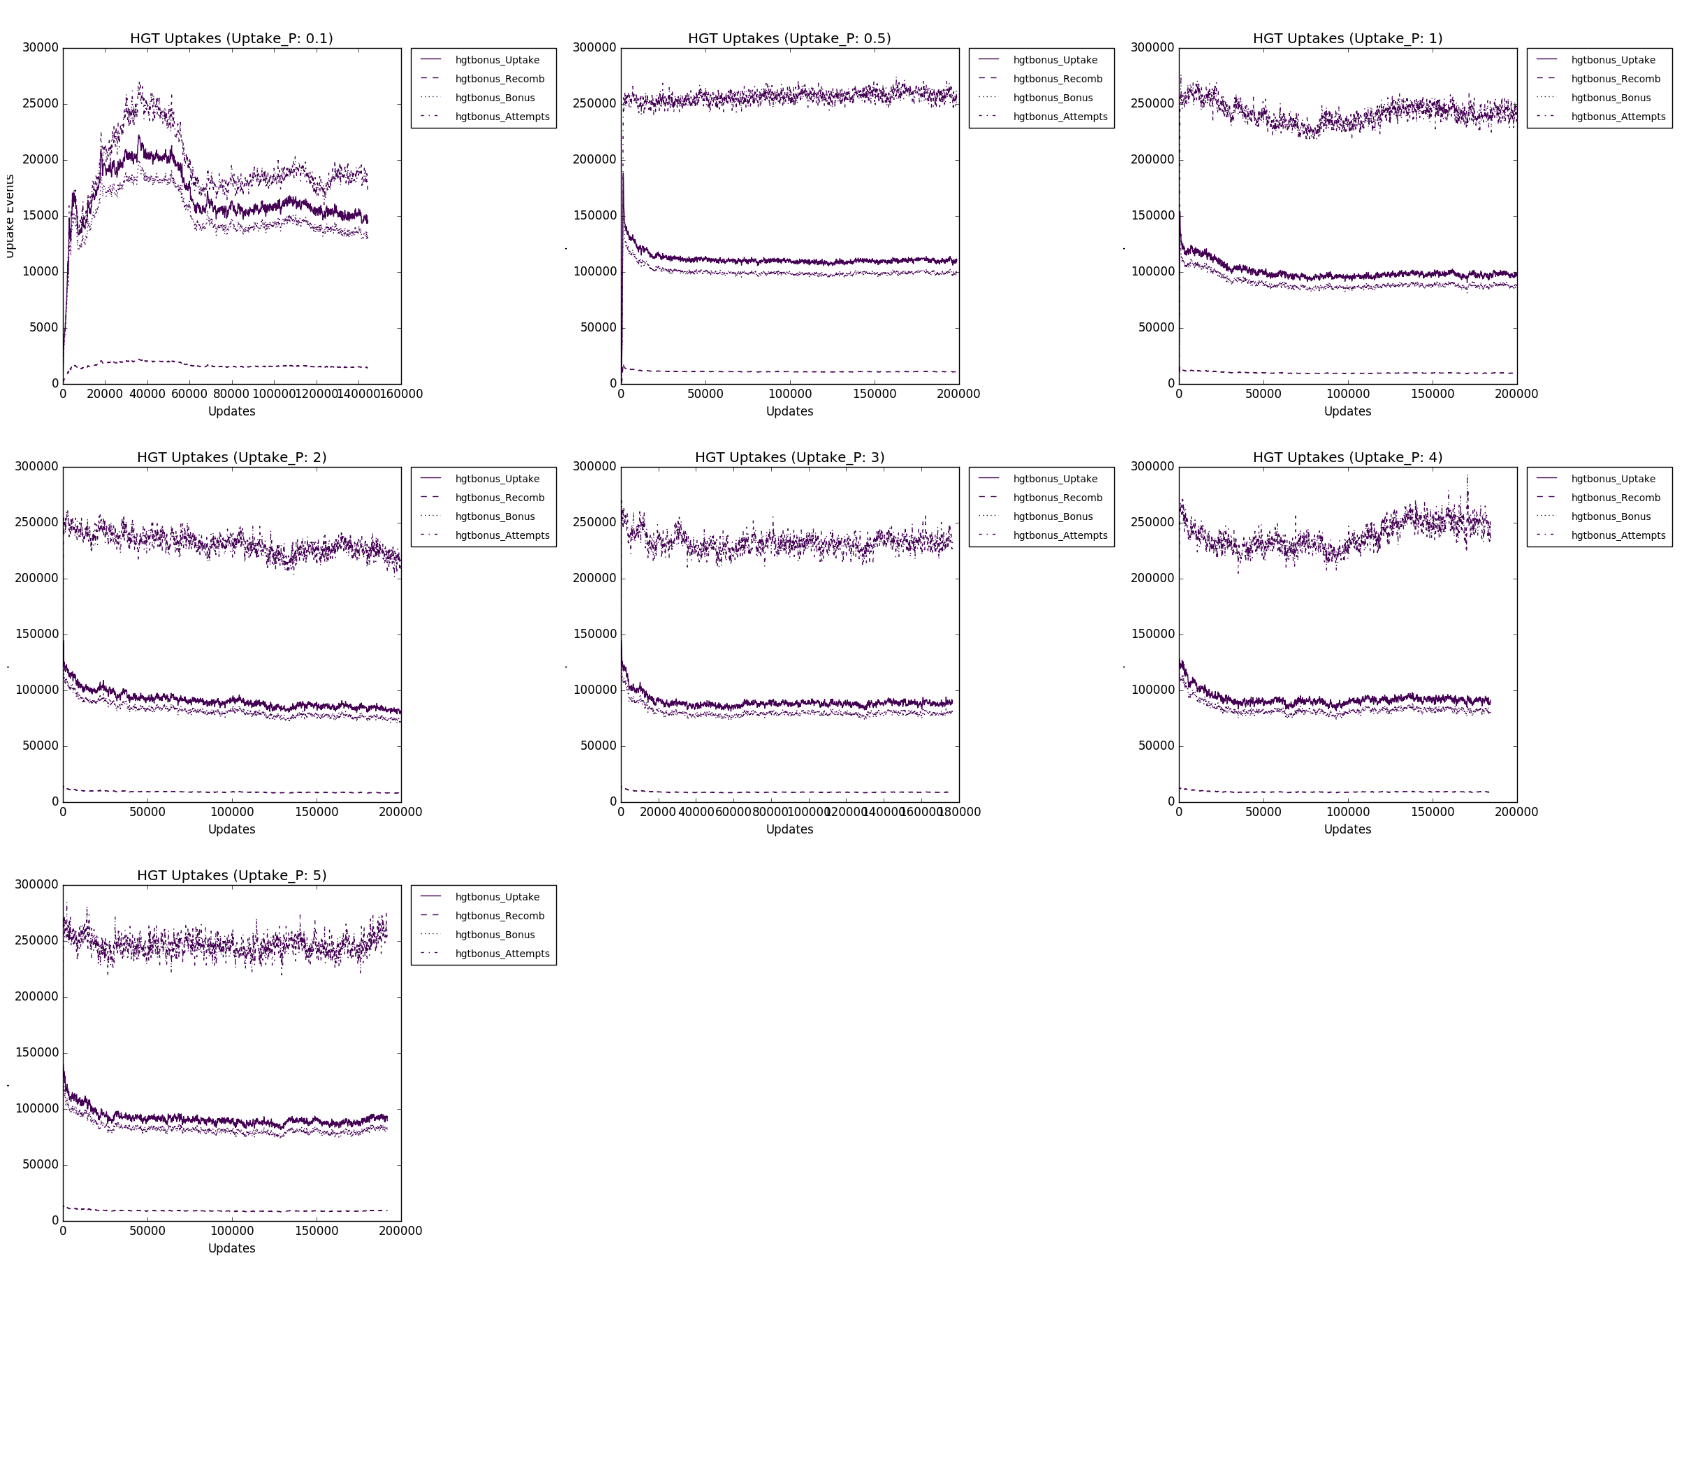

In [21]:


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30,30),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=-0.5, wspace=0)
for i, ax in enumerate(axes.flat, start=1):
    
    if i-1 < len(files):
        img = Image.open(files[i-1])
        ax.imshow(img)

    ax.set_axis_off() 
    i+=1
plt.show()